In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pandas as pd

from plotter import *

In [2]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

In [3]:
year = '2017'
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
outsum = processor.dict_accumulator()

In [4]:
# Load all files
for n in range(1,nfiles+1):

    with open('infiles-split/'+year+'_'+str(n)+'.json') as f:
      infiles = json.load(f)
    
    filename = '/myeosdir/vh-category/outfiles/'+year+'_'+str(n)+'.coffea'
    #filename = 'outfiles/'+year+'_'+str(n)+'.coffea'
    if os.path.isfile(filename):
        out = util.load(filename)
        outsum.add(out)
    else:
        print(n,infiles.keys())
        #print("File " + filename + " is missing")
          
scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}

scale_lumi['JetHT'] = 1
scale_lumi['SingleMuon'] = 1

outsum['templates'].scale(scale_lumi, 'dataset')
#outsum['muonkin'].scale(scale_lumi, 'dataset')
#outsum['mujetkin'].scale(scale_lumi, 'dataset')
outsum['cutflow'].scale(scale_lumi, 'dataset')

cutflow = outsum['cutflow'].group('dataset', hist.Cat('process', 'Process'), pmap).sum('genflavor').integrate('region','muoncontrol')
templates = outsum['templates'].group('dataset', hist.Cat('process', 'Process'), pmap).integrate('systematic','nominal')
#muonkin = outsum['muonkin'].group('dataset', hist.Cat('process', 'Process'), pmap)
#mujetkin = outsum['mujetkin'].group('dataset', hist.Cat('process', 'Process'), pmap)
del outsum

print('ok')

2416 dict_keys(['WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8'])


/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f332c10a400>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f32c116b610>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


ok


In [5]:
cutflow.integrate('process','muondata').values()

{(): array([2.9164308e+07, 1.6151331e+07, 1.1500500e+05, 1.1500500e+05,
        1.1469000e+04, 4.0210000e+03, 3.6390000e+03, 8.7600000e+02,
        5.7300000e+02, 5.9000000e+01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00])}

In [6]:
cutflow.integrate('process','ttbar').values()

{(): array([3.14399535e+07, 3.14399535e+07, 1.03192968e+05, 1.03192968e+05,
        1.18064022e+04, 6.25013012e+03, 4.71574794e+03, 7.94803510e+02,
        5.67497033e+02, 6.69196149e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00])}

In [7]:
df1 = pd.DataFrame([])

df1['QCD'] = cutflow.values()[('QCD',)]
df1['Wjets'] = cutflow.values()[('Wjets',)]
df1['Zjets'] = cutflow.values()[('Zjets',)]
df1['VV'] = cutflow.values()[('VV',)]
df1['ttbar'] = cutflow.values()[('ttbar',)]
df1['singlet'] = cutflow.values()[('singlet',)]
df1['data'] = cutflow.values()[('muondata',)]

df1 = df1[1:10].astype('int')
df1.index = ['Jet kinematics','Jet ID','Jet $N_2^\text{DDT}$','b-tag','No e/tau','One muon','Dphi(muon,AK8)','AK4jets','DeepDoubleB']
df1.to_latex(buf=year+'/cutflow-muoncr.tex')

In [8]:
deta_cut = 0
mjj_cut = 0

/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=process) instance at 0x7f32c116b430>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=process) instance at 0x7f32c116b430>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)
/opt/conda/lib/python3.8/site-packages

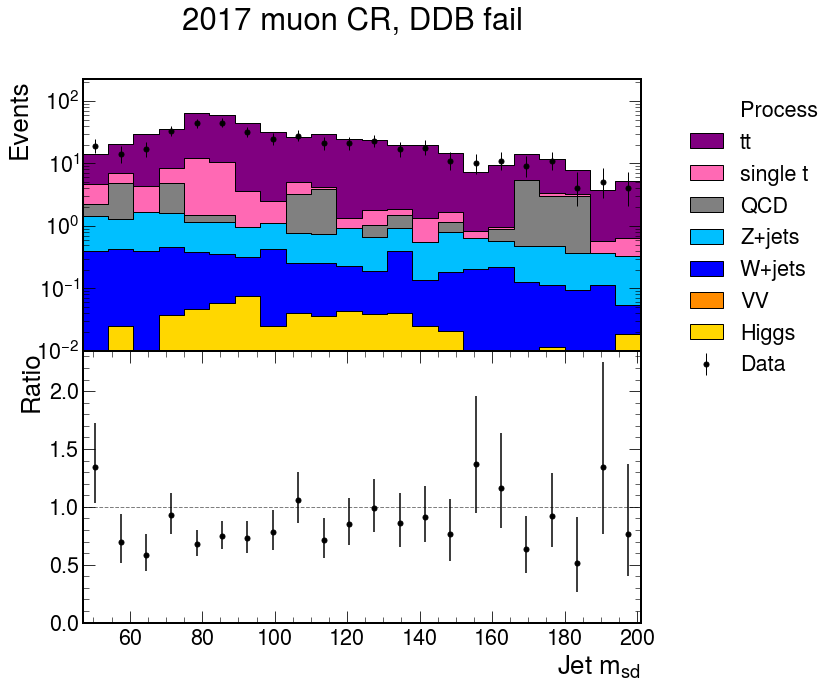

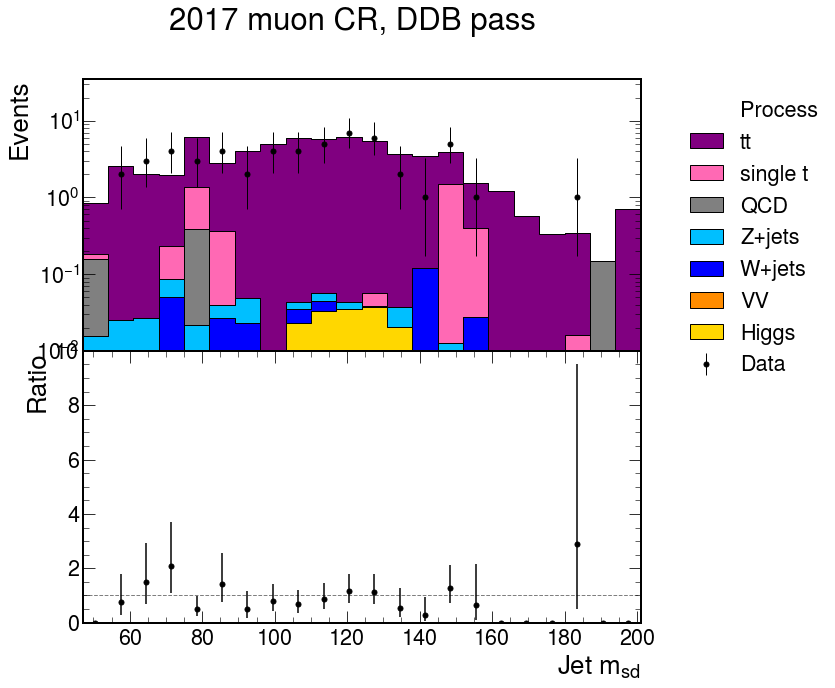

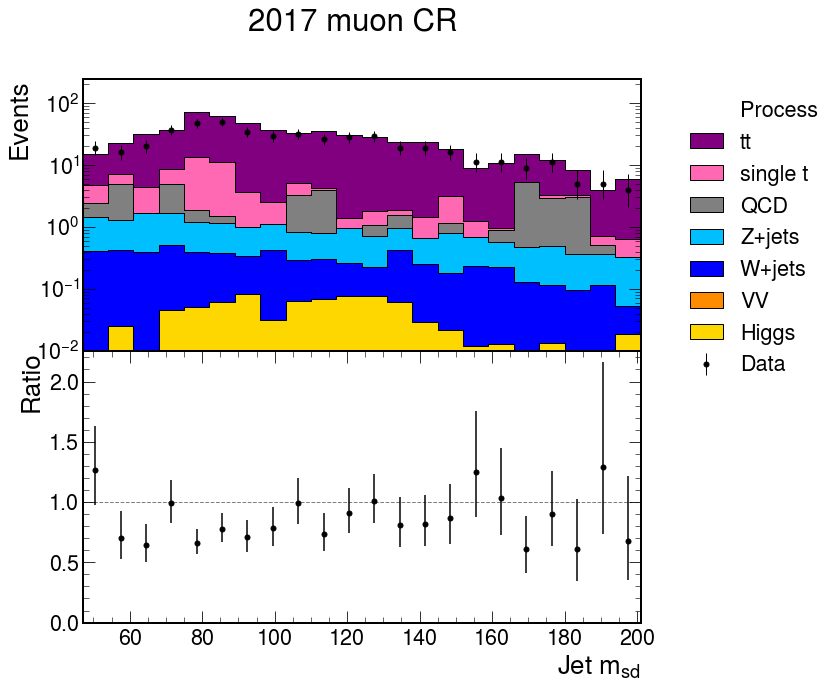

In [12]:
h = templates.integrate('region', 'muoncontrol').sum('pt1','DR').integrate('ddb1',int_range=slice(0,0.89))
plot_datamc_muoncr(h,year+'/muCR_msd1_fail',year+" muon CR, DDB fail")
h = templates.integrate('region', 'muoncontrol').sum('pt1','DR').integrate('ddb1',int_range=slice(0.89,1))
plot_datamc_muoncr(h,year+'/muCR_msd1_pass',year+" muon CR, DDB pass")
h = templates.integrate('region', 'muoncontrol').sum('pt1','DR','ddb1')
plot_datamc_muoncr(h,year+'/muCR_msd1',year+" muon CR")

/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=process) instance at 0x7f32c116b430>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


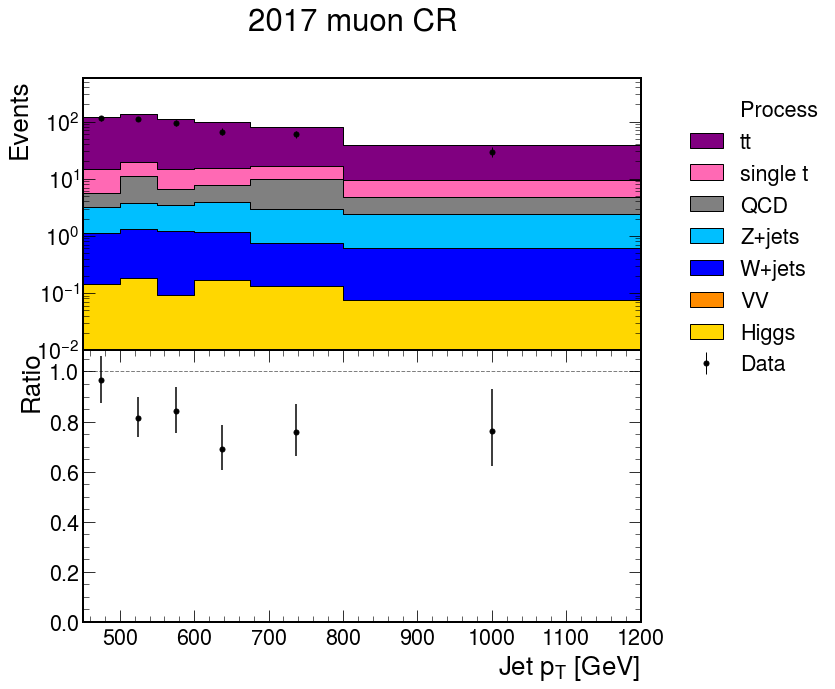

In [13]:
h = templates.integrate('region', 'muoncontrol').sum('ddb1','msd1','DR')
plot_datamc_muoncr(h,year+'/muCR_pt1',year+" muon CR")

In [ ]:
h = mujetkin.integrate('region', 'muoncontrol').sum('ddb1','DR')
plot_datamc_muoncr(h,year+'/muCR_msd1',year+" muon CR")

In [ ]:
h = mujetkin.integrate('region', 'muoncontrol').sum('eta1').integrate('deta',int_range=slice(deta_cut,7)).integrate('mjj',int_range=slice(mjj_cut,4000))
plot_datamc_muoncr(h,year+'/muCR_ddb1',year+" muon CR")

In [ ]:
h = muonkin.integrate('region', 'muoncontrol').sum('etamu',).integrate('ddb1',int_range=slice(0.89,1)).integrate('deta',int_range=slice(deta_cut,7)).integrate('mjj',int_range=slice(mjj_cut,4000))
plot_datamc_muoncr(h,year+'/muCR_ptmu_pass',year+" muon CR, DDB pass")
h = muonkin.integrate('region', 'muoncontrol').sum('etamu').integrate('ddb1',int_range=slice(0,0.89)).integrate('deta',int_range=slice(deta_cut,7)).integrate('mjj',int_range=slice(mjj_cut,4000))
plot_datamc_muoncr(h,year+'/muCR_ptmu_fail',year+" muon CR, DDB fail")
h = muonkin.integrate('region', 'muoncontrol').sum('etamu','ddb1').integrate('deta',int_range=slice(deta_cut,7)).integrate('mjj',int_range=slice(mjj_cut,4000))
plot_datamc_muoncr(h,year+'/muCR_ptmu',year+" muon CR")

In [ ]:
h = muonkin.integrate('region', 'muoncontrol').sum('ptmu').integrate('ddb1',int_range=slice(0.89,1)).integrate('deta',int_range=slice(deta_cut,7)).integrate('mjj',int_range=slice(mjj_cut,4000))
plot_datamc_muoncr(h,year+'/muCR_etamu_pass',year+" muon CR, DDB pass")
h = muonkin.integrate('region', 'muoncontrol').sum('ptmu').integrate('ddb1',int_range=slice(0,0.89)).integrate('deta',int_range=slice(deta_cut,7)).integrate('mjj',int_range=slice(mjj_cut,4000))
plot_datamc_muoncr(h,year+'/muCR_etamu_fail',year+" muon CR, DDB fail")
h = muonkin.integrate('region', 'muoncontrol').sum('ptmu','ddb1').integrate('deta',int_range=slice(deta_cut,7)).integrate('mjj',int_range=slice(mjj_cut,4000))
plot_datamc_muoncr(h,year+'/muCR_etamu',year+" muon CR")